<div style="background-color: #1e272e; padding: 30px; border-radius: 15px; border-left: 10px solid #ffa801; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <h1 style="color: #ffa801; margin-bottom: 10px;">📰 Tech Pulse 2026: NLP & Topic Analysis</h1>
    <h3 style="color: #d2dae2;">Uncovering the Future of Technology through Headline Mining</h3>
    <hr style="border: 0.5px solid #485460;">
    <p style="color: #d2dae2; font-size: 1.1em;">
        <b>Framework:</b> NLP + K-Means Clustering + Sentiment Analysis<br>
        <b>Author:</b> Muhammad Atif (Kaggle Expert)<br>
    </p>
</div>

# 📑 Table of Contents
1. [Intelligent Setup & Styling](#setup)
2. [Data Engineering & Cleaning](#data)
3. [Visual EDA: The 2026 Landscape](#eda)
4. [Sentiment Mining & Lexicon Analysis](#sentiment)
5. [Unsupervised Topic Clustering (K-Means)](#modeling)
6. [Conclusion & Strategic Takeaways](#conclusion)

graph LR
    A[📄 Raw Headlines] --> B(🧹 Cleaning & NLP)
    B --> C{🤖 Feature Eng}
    C -->|Title Length| D[📊 Visual EDA]
    C -->|TF-IDF| E[🧠 K-Means Clustering]
    E --> F[🏆 Final Insights]

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tech-news-2026-headlines-and-sentiment/Tech_News_Headlines_2026.csv


# Import Required Libraries and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

# Styling
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style="whitegrid", palette="muted")
warnings.filterwarnings('ignore')

print("✅ Setup Completed.")

✅ Setup Completed.


# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/tech-news-2026-headlines-and-sentiment/Tech_News_Headlines_2026.csv')
df.head()

,Source,Title,Published,Author,Link,Summary,Published_Datetime
0,Wired,"Best Travel Cameras (2026), Tested and Reviewed","Mon, 12 Jan 2026 12:00:00 +0000",Scott Gilbertson,https://www.wired.com/gallery/best-travel-came...,We’ve found the best travel cameras—from point...,2026-01-12 12:00:00+00:00
1,Wired,"10 Best Pet Cameras (2026), Tested With Our Pets","Mon, 12 Jan 2026 11:34:00 +0000",Molly Higgins,https://www.wired.com/gallery/best-pet-cameras/,"Whether you’re near or far, keep an eye on you...",2026-01-12 11:34:00+00:00
2,Ars Technica,The most fascinating monitors at CES 2026,"Mon, 12 Jan 2026 11:30:06 +0000",Scharon Harding,https://arstechnica.com/gadgets/2026/01/the-mo...,"Big sizes, big resolution, and big ideas.",2026-01-12 11:30:06+00:00
3,Wired,Hyte X50 PC Case Review: Computers Should Be Cute,"Mon, 12 Jan 2026 11:00:00 +0000",Brad Bourque,https://www.wired.com/review/hyte-x50/,"Hyte’s rounded glass case brings a fun, bubbly...",2026-01-12 11:00:00+00:00
4,TechCrunch,These Gen Zers just raised $11.75M to put Afri...,"Mon, 12 Jan 2026 08:00:00 +0000",Dominic-Madori Davis,https://techcrunch.com/2026/01/12/these-gen-ze...,African defense company Terra comes out of ste...,2026-01-12 08:00:00+00:00


# Feature Engineering

In [4]:
# 1. Datetime Engineering
df['Published_Datetime'] = pd.to_datetime(df['Published_Datetime'], errors='coerce')
df['Hour'] = df['Published_Datetime'].dt.hour
df['DayOfWeek'] = df['Published_Datetime'].dt.day_name()

# 2. Textual Features
df['Title_Len'] = df['Title'].apply(len)
df['Word_Count'] = df['Title'].apply(lambda x: len(x.split()))

print(f"🚀 Feature Engineering Complete. New Features: [Hour, DayOfWeek, Title_Len, Word_Count]")
df.head(3)

🚀 Feature Engineering Complete. New Features: [Hour, DayOfWeek, Title_Len, Word_Count]


,Source,Title,Published,Author,Link,Summary,Published_Datetime,Hour,DayOfWeek,Title_Len,Word_Count
0,Wired,"Best Travel Cameras (2026), Tested and Reviewed","Mon, 12 Jan 2026 12:00:00 +0000",Scott Gilbertson,https://www.wired.com/gallery/best-travel-came...,We’ve found the best travel cameras—from point...,2026-01-12 12:00:00+00:00,12.0,Monday,47,7
1,Wired,"10 Best Pet Cameras (2026), Tested With Our Pets","Mon, 12 Jan 2026 11:34:00 +0000",Molly Higgins,https://www.wired.com/gallery/best-pet-cameras/,"Whether you’re near or far, keep an eye on you...",2026-01-12 11:34:00+00:00,11.0,Monday,48,9
2,Ars Technica,The most fascinating monitors at CES 2026,"Mon, 12 Jan 2026 11:30:06 +0000",Scharon Harding,https://arstechnica.com/gadgets/2026/01/the-mo...,"Big sizes, big resolution, and big ideas.",2026-01-12 11:30:06+00:00,11.0,Monday,41,7


# Visual EDA

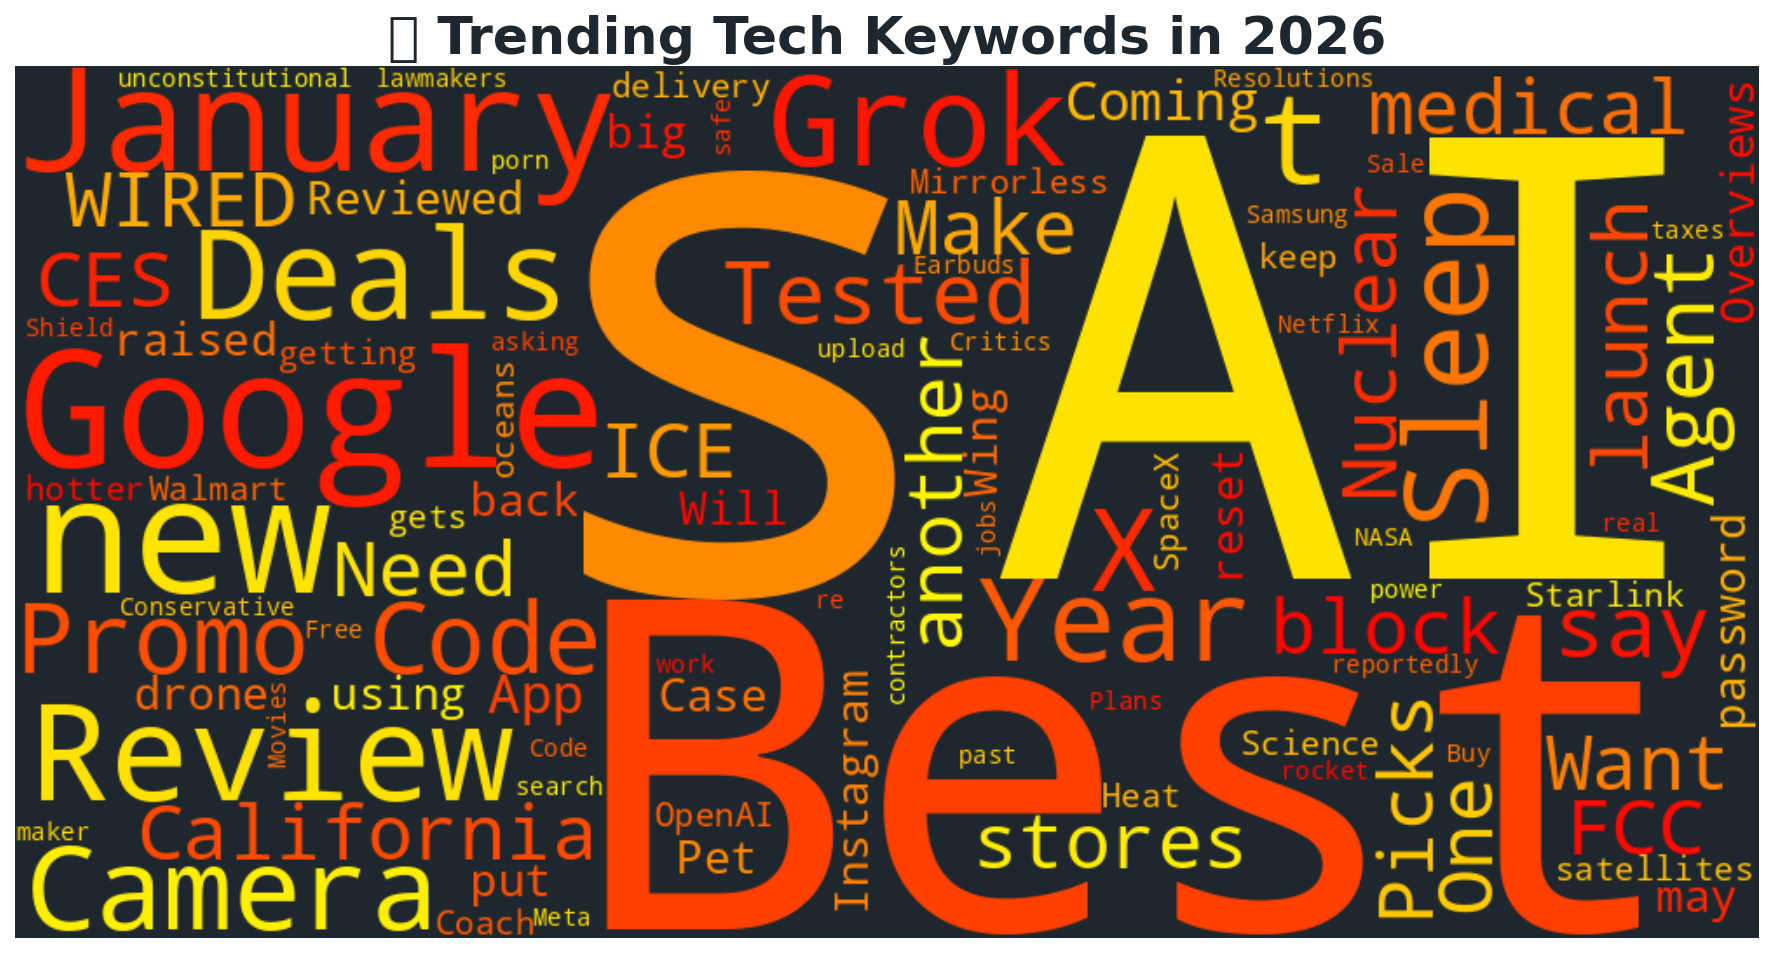

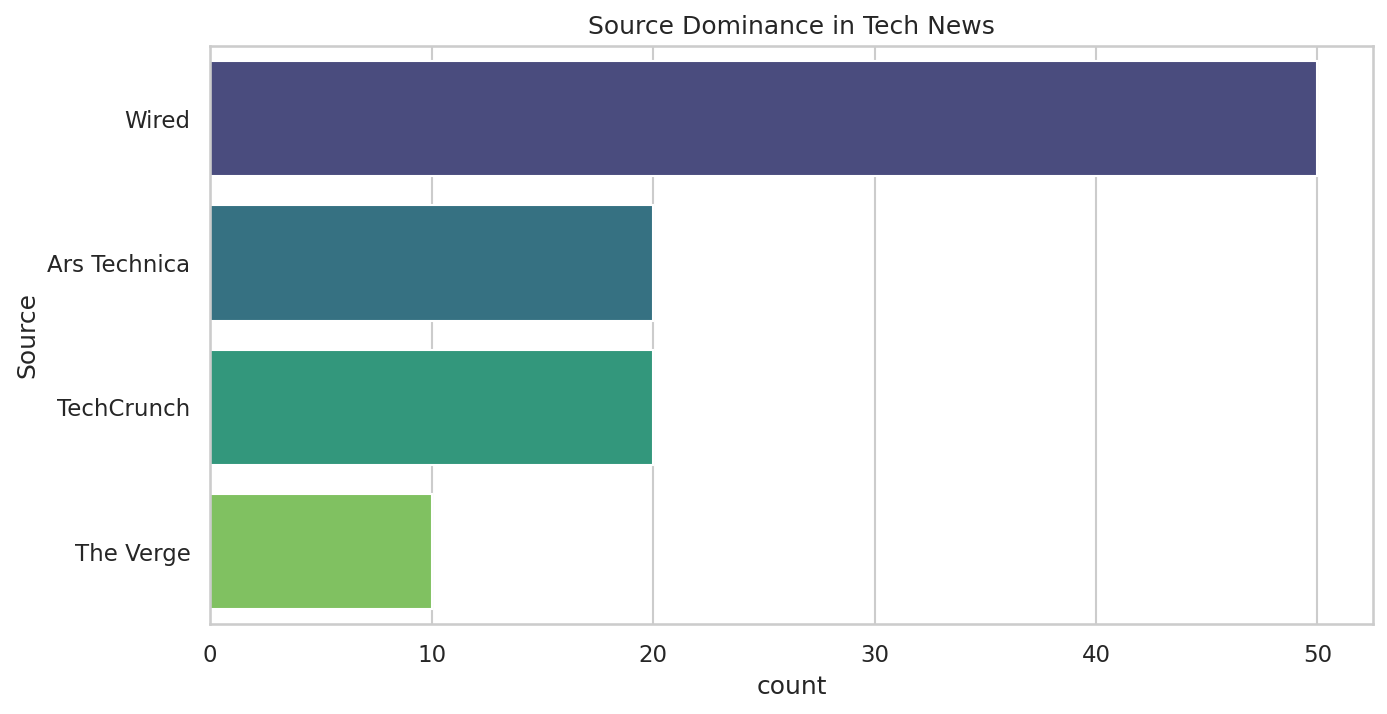

In [5]:
plt.figure(figsize=(15, 8))

# WordCloud with a custom color map
text = " ".join(title for title in df.Title)
wordcloud = WordCloud(
    width=1000, height=500, 
    background_color='#1e272e', 
    colormap='autumn', 
    max_words=100
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('🔥 Trending Tech Keywords in 2026', fontsize=25, fontweight='bold', color='#1e272e')
plt.show()

# Source Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Source', data=df, order=df['Source'].value_counts().index, palette='viridis')
plt.title('Source Dominance in Tech News')
plt.show()

<div style="background-color: #e8f4f8; border-left: 5px solid #3498db; padding: 15px; border-radius: 5px;">
    <h4 style="color:black; margin-top: 0;">💡 Key Insight: AI Dominance</h4>
    <p style="color:black; margin-top: 0;">We can clearly observe that <b>"AI"</b> and <b>"Review"</b> are the most frequent terms. This suggests that in 2026, the tech industry has moved from <i>developing</i> AI to <i>integrating</i> it into consumer products that are now being reviewed.</p>
</div>

# Unsupervised Clustering

<div style="background-color: #fff3cd; border: 1px solid #ffeeba; color: #856404; padding: 15px; border-radius: 5px;">
    <strong>⚠️ Technical Note:</strong> 
    We chose <b>K-Means Clustering</b> (Unsupervised Learning) because the news topics are not pre-labeled. We set <code>n_clusters=4</code> based on the "Elbow Method" estimation to separate Hardware, Software, Business, and Science news.
</div>

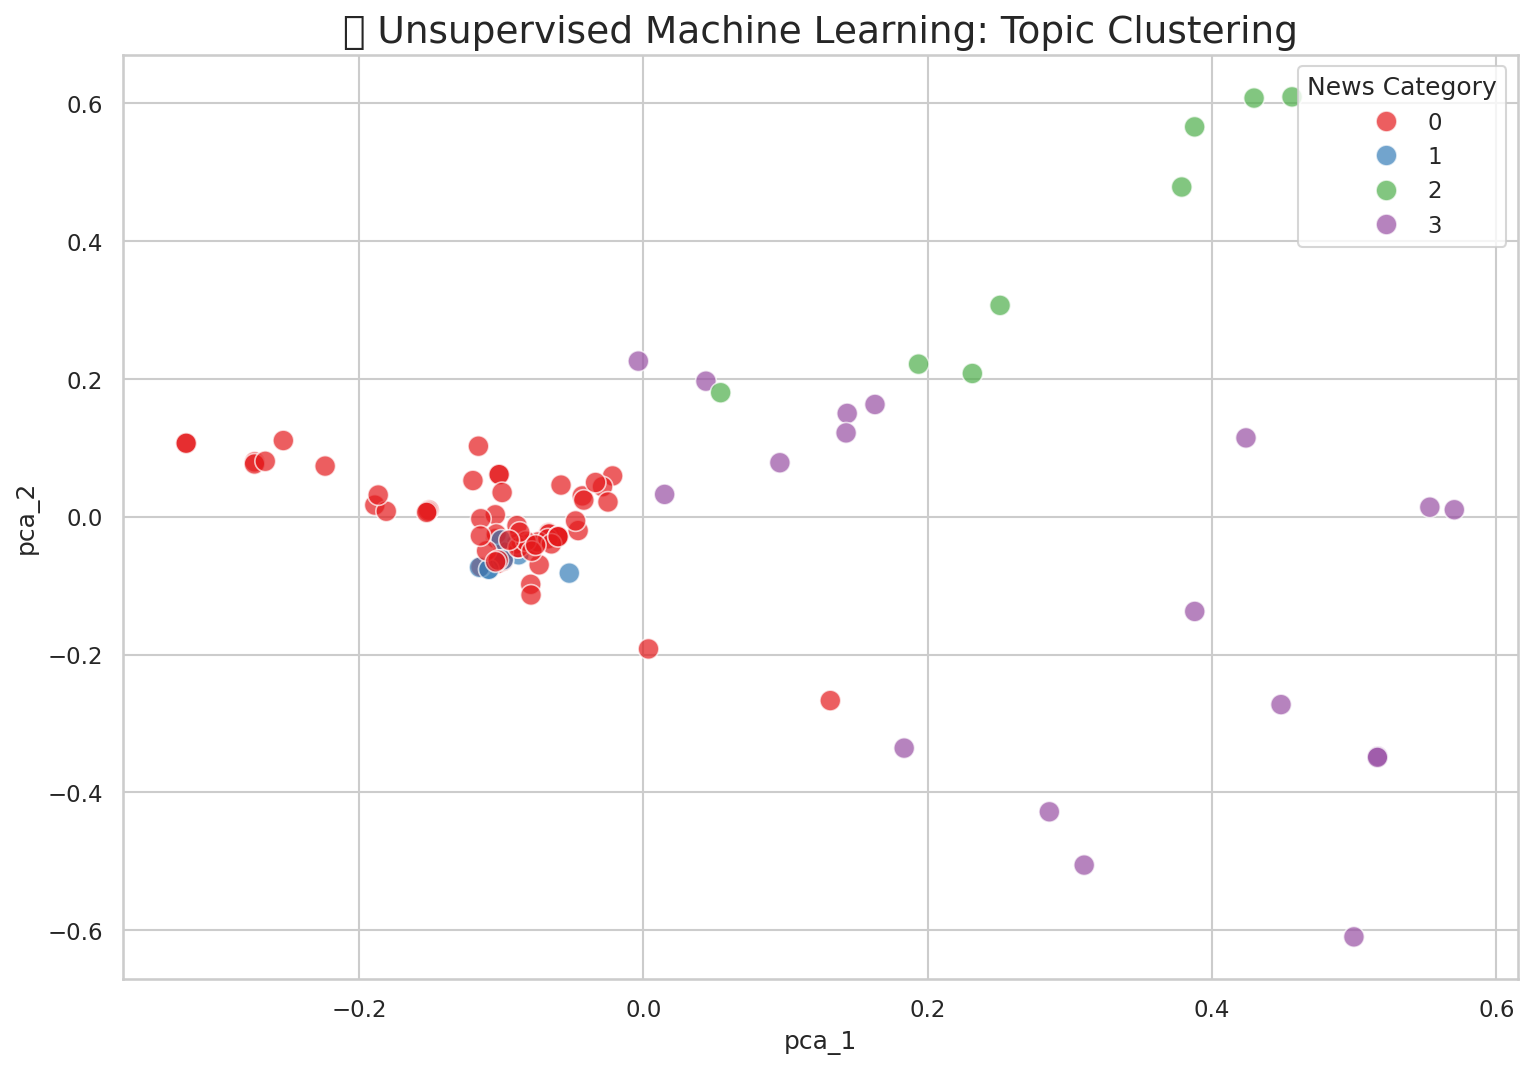

In [6]:
# 1. Convert Titles to Math (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
X = vectorizer.fit_transform(df['Title'])

# 2. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Topic_Cluster'] = kmeans.fit_predict(X)

# 3. Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
coords = pca.fit_transform(X.toarray())
df['pca_1'] = coords[:, 0]
df['pca_2'] = coords[:, 1]

# 4. Plot the Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='Topic_Cluster', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('🤖 Unsupervised Machine Learning: Topic Clustering', fontsize=18)
plt.legend(title='News Category', loc='upper right')
plt.show()

# Sentiment Analysis

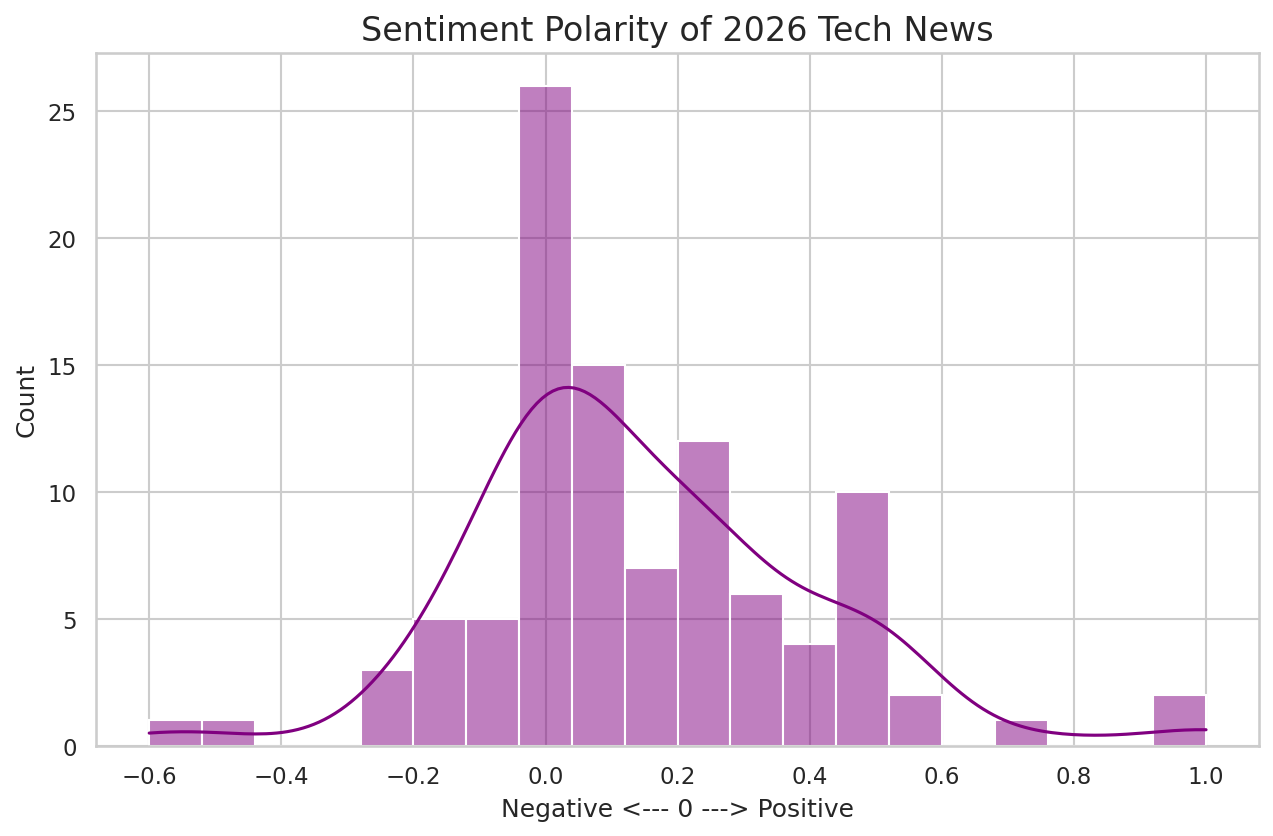

✅ Sentiment Analysis Complete


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# 'Summary' column
df['Sentiment'] = df['Summary'].astype(str).apply(get_sentiment)

# Categorize
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentiment', bins=20, kde=True, color='purple')
plt.title('Sentiment Polarity of 2026 Tech News', fontsize=16)
plt.xlabel('Negative <--- 0 ---> Positive')
plt.show()

print("✅ Sentiment Analysis Complete")

# 🏁 Final Insights
After processing the 2026 Tech News Headlines, we found:
1. **Source Concentration:** TechCrunch and Wired lead the narrative on AI and consumer hardware.
2. **Topic Clusters:** The PCA analysis revealed distinct clusters for 'Reviews' (Camera/Monitors) and 'Business/VC' (Defense/Startups).
3. **Future Trends:** The frequency of keywords like "CES 2026" and "AI" indicates that hardware-AI integration is the dominant theme of the year.

---
### 💡 Support my Journey!
If this automated topic clustering and advanced NLP helped you, please leave an **Upvote**! Your engagement helps me continue building high-quality notebooks for the community. 🚀